In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

In [2]:
data = pd.read_csv('Messidor 2/messidor_data.csv')

In [3]:
data

image_id  adjudicated_dr_grade  adjudicated_dme  \
0     20051020_43808_0100_PP.png                   0.0              0.0   
1     20051020_43832_0100_PP.png                   1.0              0.0   
2     20051020_43882_0100_PP.png                   1.0              0.0   
3     20051020_43906_0100_PP.png                   2.0              1.0   
4     20051020_44261_0100_PP.png                   0.0              0.0   
...                          ...                   ...              ...   
1743                IM004806.jpg                   0.0              0.0   
1744                IM004811.jpg                   1.0              0.0   
1745                IM004812.jpg                   2.0              0.0   
1746                IM004831.jpg                   0.0              0.0   
1747                IM004832.jpg                   0.0              0.0   

      adjudicated_gradable  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
1743                     1  
1744                     1  
1745                     1  
1746                     1  
1747                     1  

[1748 rows x 4 columns]

In [4]:
# Import necessary libraries
import pandas as pd
from PIL import Image
import os
import numpy as np

# Specify the path to the image folder
image_folder_path = 'Messidor 2/IMAGES/'

In [5]:
# Initialize an empty list to store the images
images = []

# Loop through the filenames in the 'image_id' column of the DataFrame
for filename in data['image_id']:
    # Create the full path to the image file by concatenating the 
    # folder path with the filename
    image_path = os.path.join(image_folder_path, filename)
    
    # Open the image using PIL
    with Image.open(image_path) as img:
        # Convert the image to a numpy array (optional, but useful for later processing)
        img_array = np.array(img)
        
        # Append the image array to the list of images
        images.append(img_array)

# Convert the list of images to a numpy array
images = np.array(images)

# Print the shape of the resulting array to check
print(images.shape)

(1748,)


/var/folders/85/plrgt1yd41n_7trcdld7xbz00000gn/T/ipykernel_1944/1315454356.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [6]:
df = data

In [7]:
df = df.dropna(subset=['adjudicated_dr_grade'])

In [8]:
df['adjudicated_dr_grade'].unique()

array([0., 1., 2., 3., 4.])

# Visualize Sample Images

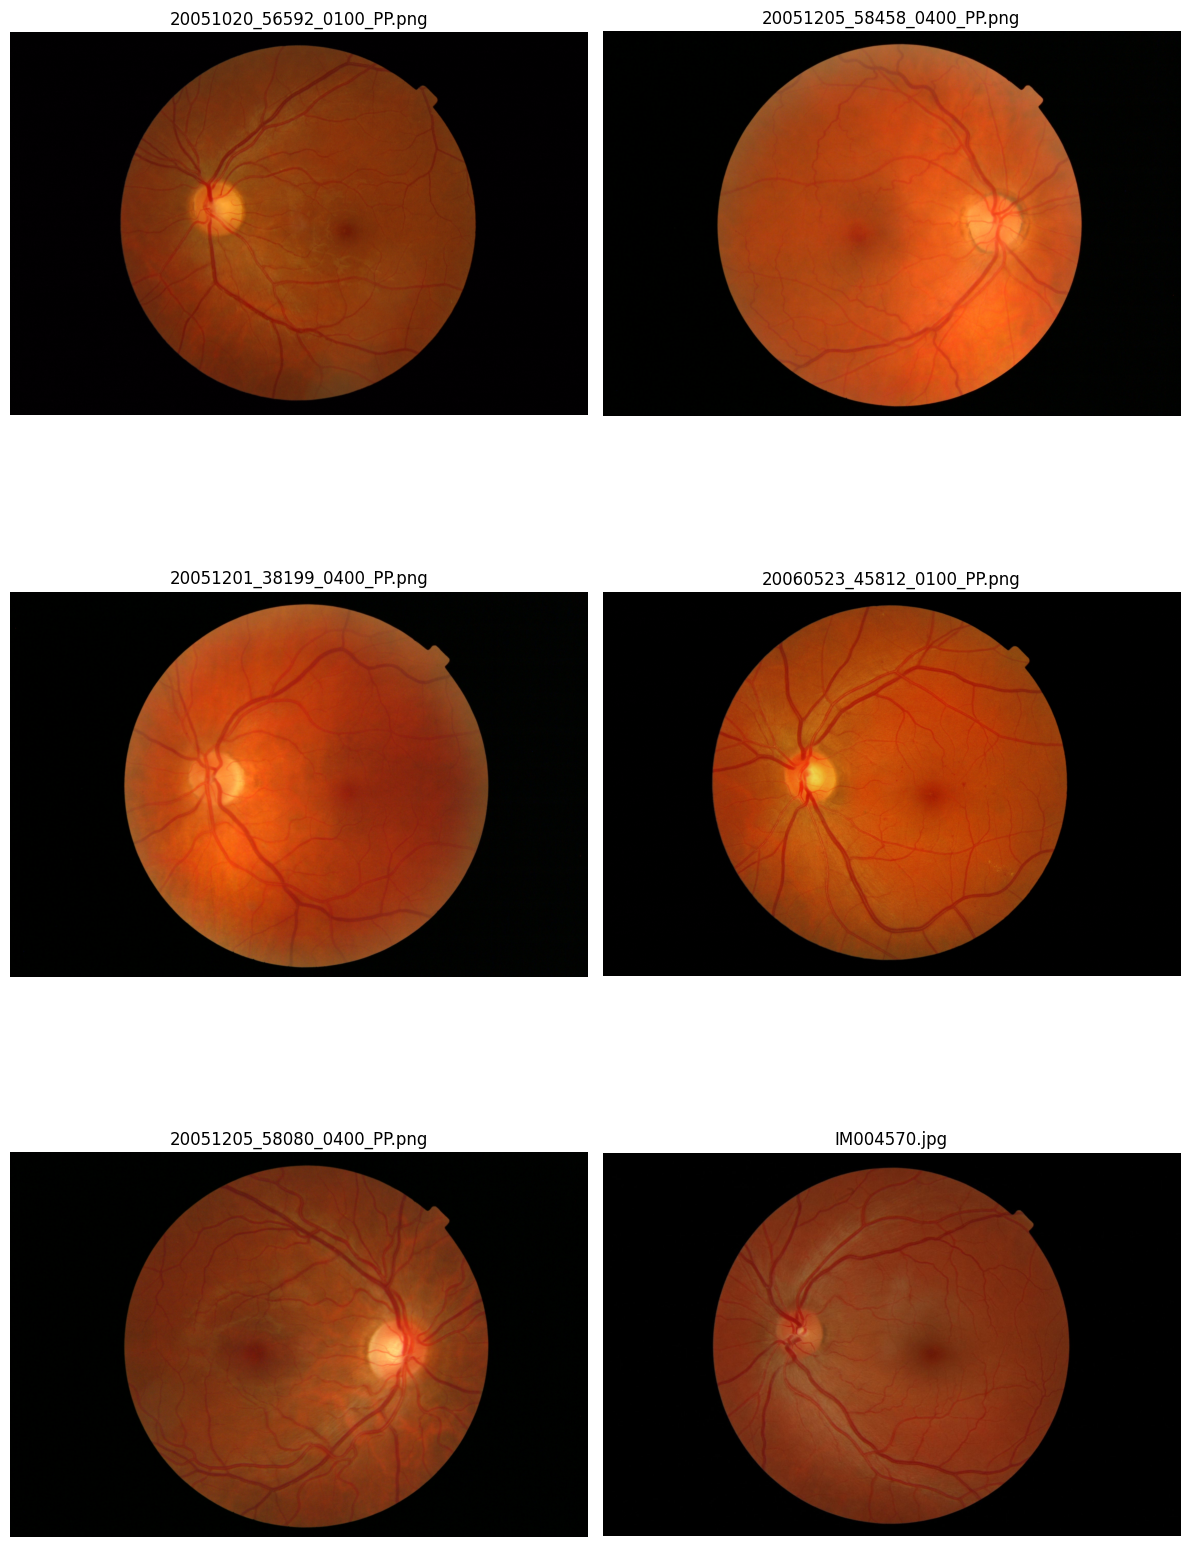

In [9]:
sample_images = df['image_id'].sample(6)

# Set up the grid
plt.figure(figsize=(12, 18))  # Width, Height - Adjust the size as per your requirement

for idx, filename in enumerate(sample_images):
    image_path = os.path.join(image_folder_path, filename)
    with Image.open(image_path) as img:
        plt.subplot(3, 2, idx+1)  # 3 rows, 2 columns, index
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
sample_image_dir = ['Messidor 2/IMAGES/20051116_44816_0400_PP.png',
'Messidor 2/IMAGES/IM001751.jpg',
'Messidor 2/IMAGES/20060412_58054_0200_PP.png',
'Messidor 2/IMAGES/IM003746.jpg',
'Messidor 2/IMAGES/20060407_44636_0200_PP.png',
'Messidor 2/IMAGES/20051021_39482_0100_PP.png']

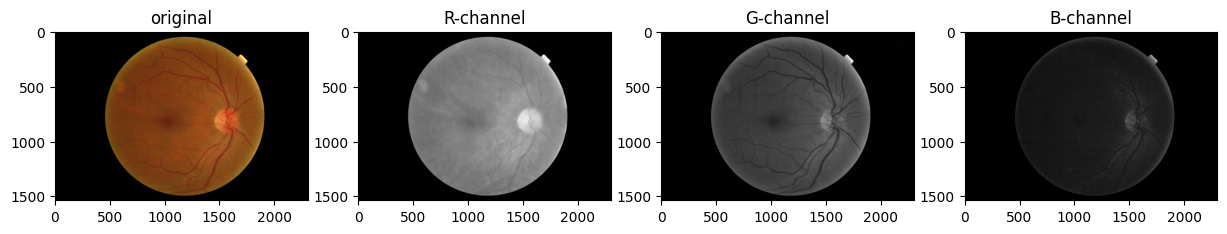

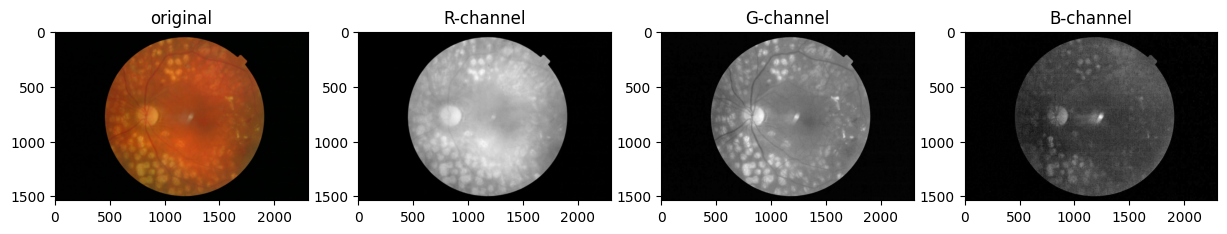

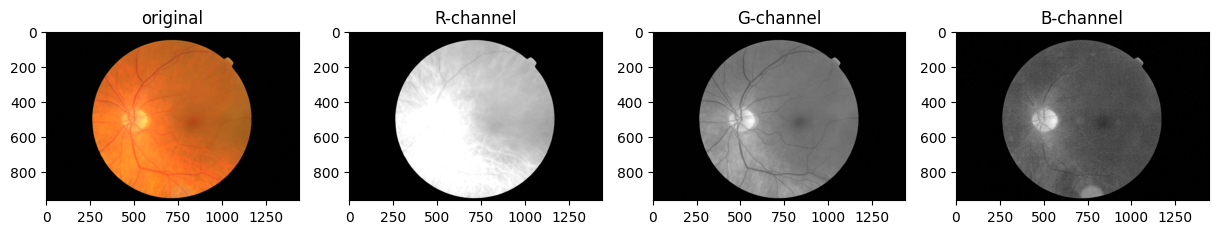

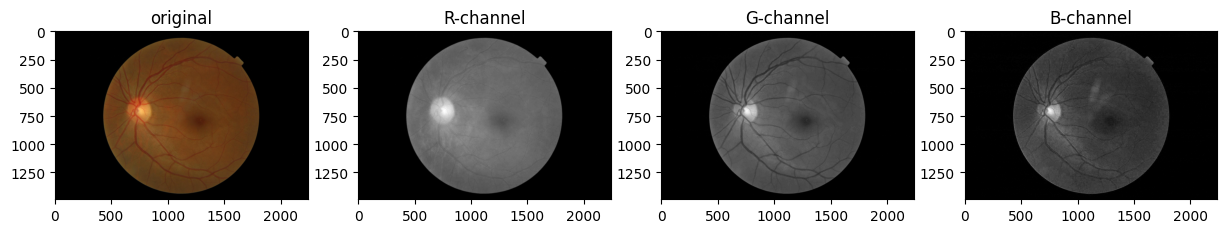

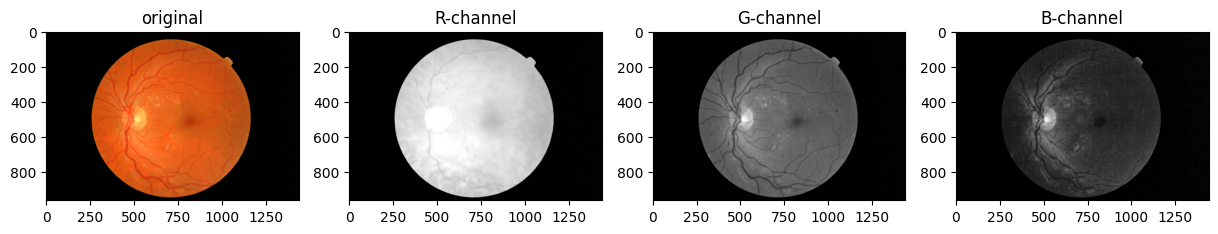

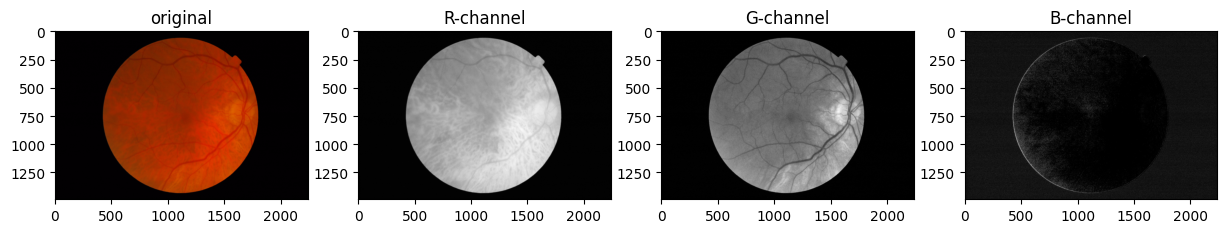

In [11]:
for image_path in sample_image_dir:
    image=plt.imread(image_path)

    plt.figure(figsize=(15,15))
    plt.subplot(141)
    plt.title("original")
    plt.imshow(image)
    plt.subplot(142)
    plt.title("R-channel")
    plt.imshow(image[:,:,0],cmap=plt.cm.gray)
    plt.subplot(143)
    plt.title("G-channel")
    plt.imshow(image[:,:,1],cmap=plt.cm.gray)
    plt.subplot(144)
    plt.title("B-channel")
    plt.imshow(image[:,:,2],cmap=plt.cm.gray)
    plt.show()

In [12]:
import cv2

In [13]:
IMG_SIZE = 1048

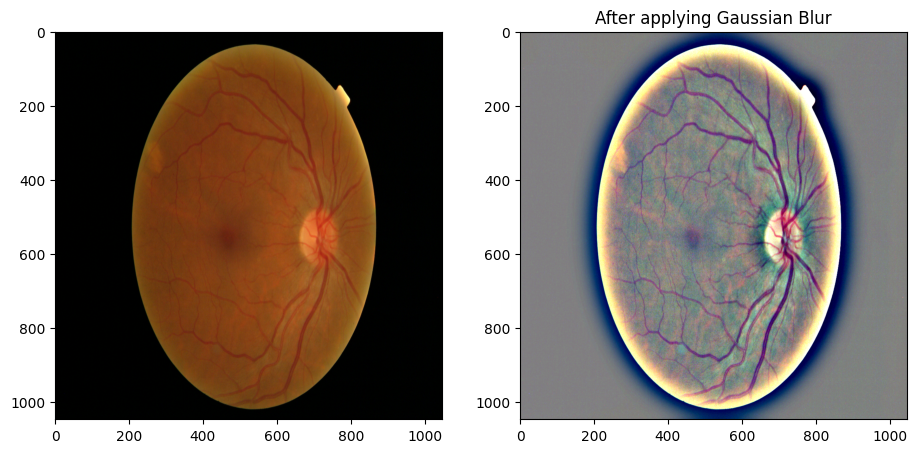

In [14]:
# rn = np.random.randint(low = 0,high = len(df_train) - 1)

img = cv2.imread('Messidor 2/IMAGES/20051116_44816_0400_PP.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

img_t = cv2.addWeighted(img,4, cv2.GaussianBlur(img , (0,0) , 30) ,-4 ,128)

f, axarr = plt.subplots(1,2,figsize = (11,11))
axarr[0].imshow(img)
axarr[1].imshow(img_t)
plt.title('After applying Gaussian Blur')
plt.show()

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Directory containing your images
image_folder_path = 'Messidor 2/IMAGES/'
output_dir = 'GB_Images/'

df['GB_image_filename'] = None

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

# Image size you want to resize to
IMG_SIZE = 512

# Get list of image filenames in the input directory
# image_filenames = os.listdir(input_dir)

# Loop through all the image filenames
for index, row in df.iterrows():
    
    # Read the image
    image_path = os.path.join(image_folder_path, row['image_id'])
    img = cv2.imread(image_path, 0) 
    
    # Convert the color
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Resize the image
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    
    # Apply the Gaussian blur technique
    img_t = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), 30), -4, 128)
    
    # Save the processed image as a new file
    output_filename = os.path.join(output_dir,row['image_id'])
    img_t_bgr = cv2.cvtColor(img_t, cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_filename, img_t_bgr)
    
    # Save the modified image
#     output_path = os.path.join(output_dir, filename)
    
#     cv2.imwrite(output_path, img_t_bgr)
    
    df.at[index, 'GB_image_filename'] = output_filename
    
    # Optionally, you can display the original and modified images
#     f, axarr = plt.subplots(1, 2, figsize=(11, 11))
#     axarr[0].imshow(img)
#     axarr[1].imshow(img_t)
#     plt.title('After applying Gaussian Blur on ' + filename)
#     plt.show()


/var/folders/85/plrgt1yd41n_7trcdld7xbz00000gn/T/ipykernel_2553/1449729586.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GB_image_filename'] = None


# Contrast-Limited Adaptive Histogram Equalisation (CLAHE) 

In [22]:
import cv2
import os
import numpy as np
import pandas as pd

# Sample dataset file path
image_folder_path = 'Messidor 2/IMAGES/'

# Output folder
output_folder_path = 'CLAHE_Images'

if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Create a new column for the processed image filenames
df['clahe_image_filename'] = None

for index, row in df.iterrows():
    # Read image
    image_path = os.path.join(image_folder_path, row['image_id'])
    img = cv2.imread(image_path, 0)  # Read in grayscale
    
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    
    # Save the processed image as a new file
    output_filename = os.path.join(output_folder_path, 'CLAHE_' + row['image_id'])
    cv2.imwrite(output_filename, cl1)
    
    # Save the new filename to the DataFrame
    df.at[index, 'clahe_image_filename'] = output_filename

# Now, df['clahe_image_filename'] contains the filenames of the processed images
df.head()

/var/folders/85/plrgt1yd41n_7trcdld7xbz00000gn/T/ipykernel_2553/3121544722.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clahe_image_filename'] = None


image_id  adjudicated_dr_grade  adjudicated_dme  \
0  20051020_43808_0100_PP.png                   0.0              0.0   
1  20051020_43832_0100_PP.png                   1.0              0.0   
2  20051020_43882_0100_PP.png                   1.0              0.0   
3  20051020_43906_0100_PP.png                   2.0              1.0   
4  20051020_44261_0100_PP.png                   0.0              0.0   

   adjudicated_gradable                     GB_image_filename  \
0                     1  GB_Images/20051020_43808_0100_PP.png   
1                     1  GB_Images/20051020_43832_0100_PP.png   
2                     1  GB_Images/20051020_43882_0100_PP.png   
3                     1  GB_Images/20051020_43906_0100_PP.png   
4                     1  GB_Images/20051020_44261_0100_PP.png   

                            clahe_image_filename  
0  CLAHE_Images/CLAHE_20051020_43808_0100_PP.png  
1  CLAHE_Images/CLAHE_20051020_43832_0100_PP.png  
2  CLAHE_Images/CLAHE_20051020_43882_0100_PP.png  
3  CLAHE_Images/CLAHE_20051020_43906_0100_PP.png  
4  CLAHE_Images/CLAHE_20051020_44261_0100_PP.png

(1440, 960)
(2304, 1536)
(1440, 960)
(2304, 1536)
(2240, 1488)
(2304, 1536)


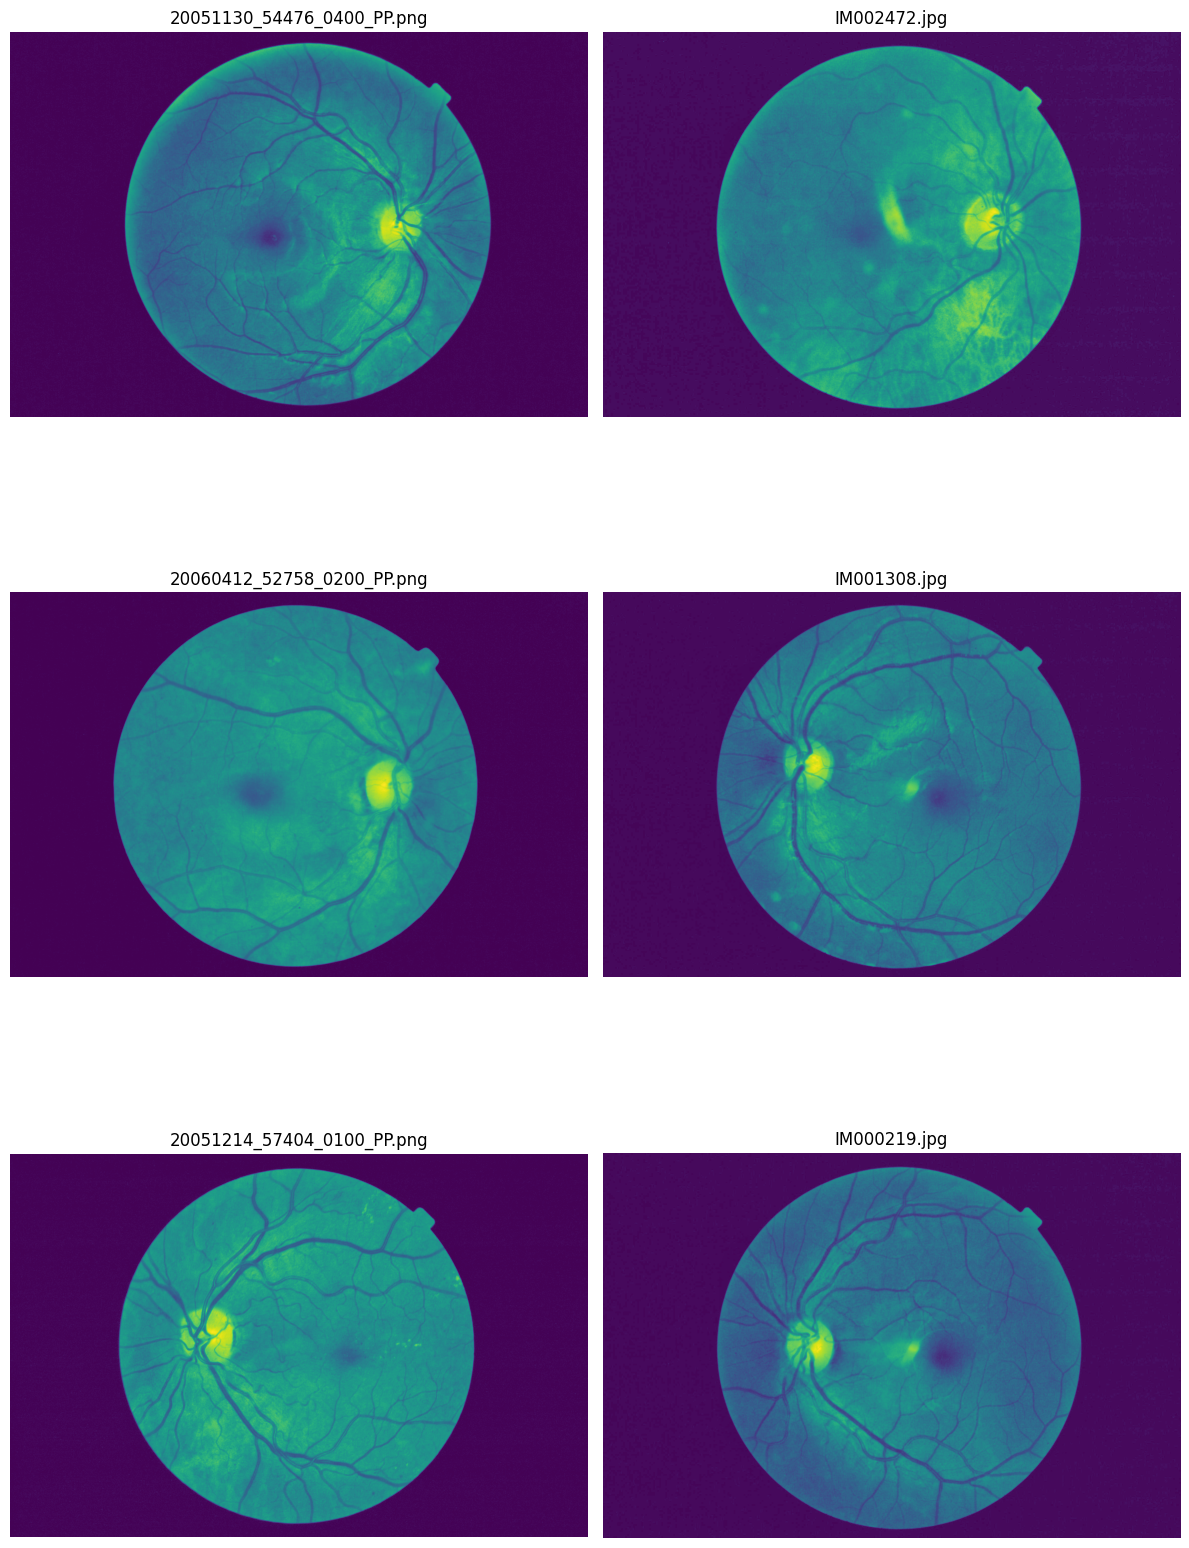

In [23]:
sample_images = df['image_id'].sample(6)

# Set up the grid
plt.figure(figsize=(12, 18))  # Width, Height - Adjust the size as per your requirement

for idx, filename in enumerate(sample_images):
    image_path = os.path.join('CLAHE_Images','CLAHE_' + filename)
    with Image.open(image_path) as img:
        print(img.size)
        plt.subplot(3, 2, idx+1)  # 3 rows, 2 columns, index
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')

plt.tight_layout()
plt.show()

# Resizing clahe images to 512x512

In [18]:
import cv2
import os
import pandas as pd

# Your data
# Sample dataset file path
output_folder_path = 'Resized_clahe_Images_512'

# Create output folder if it does not exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

# Resize all images to 2240x1488
new_size = (512, 512)

# Iterate over the image filenames in your DataFrame
for index, row in df.iterrows():
    image_path = os.path.join('CLAHE_Images','CLAHE_' + row['image_id'])
    
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, new_size)
    
    # Save the resized image to the new folder
    output_filename = os.path.join(output_folder_path, row['image_id'])
    cv2.imwrite(output_filename, resized_img)

print("All images have been resized.")

All images have been resized.


# Image Normalization

In [9]:
normalized_images = []

for index, row in df.iterrows():
    # Load image
    image_path = os.path.join('Resized_clahe_Images_512',row['image_id'])
    with Image.open(image_path) as img:
        
        # Convert to numpy array
        img_array = np.array(img)
        
        # Perform Min-Max normalization
        normalized_img_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))
        
        # Append normalized image array to list
        normalized_images.append(normalized_img_array)

# Convert the list of normalized images to a numpy array
normalized_images = np.array(normalized_images)

Min: 0.0
Max: 1.0


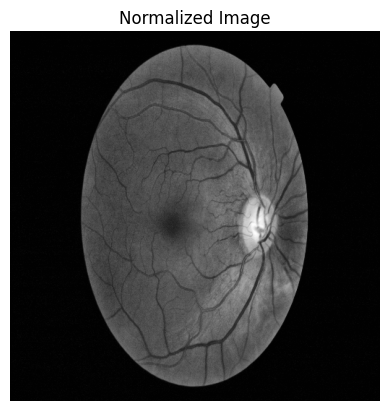

In [10]:
# Example: Check the min and max of the first normalized image
print("Min:", np.min(normalized_images[0]))
print("Max:", np.max(normalized_images[0]))

# Visualize the first normalized image
plt.imshow(normalized_images[0], cmap='gray')
plt.title('Normalized Image')
plt.axis('off')
plt.show()

# Train and Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from tqdm import tqdm

In [13]:
# Convert list of arrays to a numpy array
images = normalized_images
labels = df['adjudicated_dr_grade'].values

In [14]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# AUGMENTATION

In [15]:
import tensorflow as tf

In [16]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,      # Range (degrees) within which to randomly rotate pictures
    width_shift_range=0.2,  # Fraction of total width to randomly translate images
    height_shift_range=0.2, # Fraction of total height to randomly translate images
    shear_range=0.2,        # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest',    # Points outside the boundaries of the input are filled according to the given mode
)

In [17]:
# Fits the model on batches with real-time data augmentation:
train_generator = datagen.flow(train_images, train_labels, batch_size=32)

In [18]:
# Fits the model on batches with real-time data augmentation:
test_generator = datagen.flow(test_images, test_labels, batch_size=32)

In [19]:
len(train_generator)

44

In [20]:
len(test_generator)

11

# Displaying Augmented Image

In [21]:
# Select one image to augment
image = train_images[0]
image = image.reshape((1,) + image.shape)  # Reshape the image

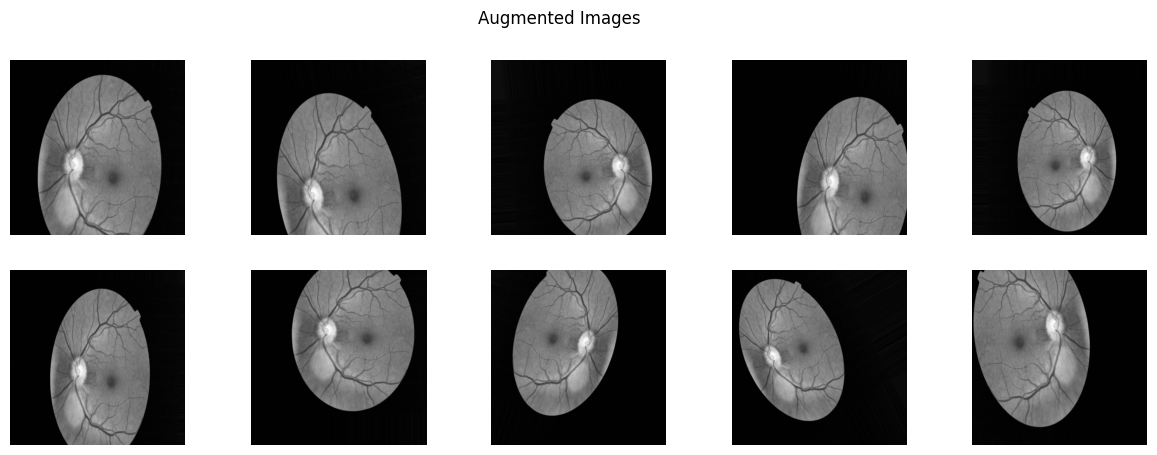

In [22]:
# The .flow() command generates batches of randomly transformed images
# It will loop indefinitely, so we need to break the loop at some point
num_augmented_images_to_show = 10
plt.figure(figsize=(15, 5))

for i, batch in enumerate(datagen.flow(image, batch_size=1)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(batch[0])
    plt.axis('off')
    
    if i == num_augmented_images_to_show - 1:
        break

plt.suptitle('Augmented Images')
plt.show()

# TODO

# Your neural network model
model = ...  

train_generator = datagen.flow(train_images, train_labels, batch_size=32)

model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // 32,
    validation_data=(test_images, test_labels),
    epochs=50,
    verbose=1
)


# AUGMENTATION 2

# MODELLING

In [23]:
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3

base_model1 = VGG16(weights='imagenet', include_top=False)
base_model2 = ResNet50(weights='imagenet', include_top=False)
base_model3 = InceptionV3(weights='imagenet', include_top=False)


In [24]:
for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model2.layers:
    layer.trainable = False
for layer in base_model3.layers:
    layer.trainable = False


In [27]:
# %%timeit
# def extract_features1(model, data):
#     return model.predict(data)

# features1_train = extract_features1(base_model1, train_data)
# features2_train = extract_features1(base_model2, train_data)
# features3_train = extract_features1(base_model3, train_data)

# features1_test = extract_features(base_model1, X_test)
# features2_test = extract_features(base_model2, X_test)
# features3_test = extract_features(base_model3, X_test)


In [25]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [26]:
def build_gap_model(base_model):
    gap_layer = GlobalAveragePooling2D()(base_model.output)
    gap_model = Model(inputs=base_model.input, outputs=gap_layer)
    return gap_model

In [27]:
gap_model1 = build_gap_model(base_model1)
gap_model2 = build_gap_model(base_model2)
gap_model3 = build_gap_model(base_model3)

In [31]:
# Step 2: Use Pre-trained CNNs to Extract Features
# def extract_features(generator, model1, model2, model3):
#     features1, features2, features3, labels = [], [], [], []
#     for batch_data, batch_labels in generator:
#         print('Entered')
#         features1.append(model1.predict(batch_data))
#         features2.append(model2.predict(batch_data))
#         features3.append(model3.predict(batch_data))
#         labels.append(batch_labels)
#         print('Done')
#     features1 = np.concatenate(features1, axis=0)
#     features2 = np.concatenate(features2, axis=0)
#     features3 = np.concatenate(features3, axis=0)
#     labels = np.concatenate(labels, axis=0)
#     return features1, features2, features3, labels


In [28]:
def extract_features(generator, model1, model2, model3):
    features1, features2, features3, labels = [], [], [], []
    
    # Number of steps to loop over generator
    steps = len(generator)
    
    for i in tqdm(range(steps)):
        batch_data, batch_labels = next(generator)
        features1.append(model1.predict(batch_data))
        features2.append(model2.predict(batch_data))
        features3.append(model3.predict(batch_data))
        labels.append(batch_labels)
        
    features1 = np.concatenate(features1, axis=0)
    features2 = np.concatenate(features2, axis=0)
    features3 = np.concatenate(features3, axis=0)
    labels = np.concatenate(labels, axis=0)
    
    return features1, features2, features3, labels


In [29]:
features1_train, features2_train, features3_train, train_labels_augmented = extract_features(
    train_generator, gap_model1, gap_model2, gap_model3 )

  0%|                                                    | 0/44 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


  2%|█                                           | 1/44 [00:23<16:36, 23.17s/it]

1/1 [==============================] - 3s 3s/step


  5%|██                                          | 2/44 [00:45<15:54, 22.73s/it]

1/1 [==============================] - 3s 3s/step


  7%|███                                         | 3/44 [01:08<15:32, 22.75s/it]

1/1 [==============================] - 3s 3s/step


  9%|████                                        | 4/44 [01:31<15:14, 22.87s/it]

1/1 [==============================] - 3s 3s/step


 11%|█████                                       | 5/44 [01:54<14:58, 23.05s/it]

1/1 [==============================] - 3s 3s/step


 14%|██████                                      | 6/44 [02:18<14:42, 23.23s/it]

1/1 [==============================] - 4s 4s/step


 16%|███████                                     | 7/44 [02:42<14:34, 23.63s/it]

1/1 [==============================] - 3s 3s/step


 18%|████████                                    | 8/44 [03:05<14:02, 23.40s/it]

1/1 [==============================] - 3s 3s/step


 20%|█████████                                   | 9/44 [03:28<13:27, 23.07s/it]

1/1 [==============================] - 3s 3s/step


 23%|█████████▊                                 | 10/44 [03:50<12:54, 22.78s/it]

1/1 [==============================] - 3s 3s/step


 25%|██████████▊                                | 11/44 [04:11<12:19, 22.40s/it]

1/1 [==============================] - 3s 3s/step


 27%|███████████▋                               | 12/44 [04:33<11:48, 22.13s/it]

1/1 [==============================] - 3s 3s/step


 30%|████████████▋                              | 13/44 [04:55<11:28, 22.20s/it]

1/1 [==============================] - 3s 3s/step


 32%|█████████████▋                             | 14/44 [05:17<11:06, 22.21s/it]

1/1 [==============================] - 3s 3s/step


 34%|██████████████▋                            | 15/44 [05:40<10:46, 22.31s/it]

1/1 [==============================] - 4s 4s/step


 36%|███████████████▋                           | 16/44 [06:03<10:35, 22.70s/it]

1/1 [==============================] - 3s 3s/step


 39%|████████████████▌                          | 17/44 [06:27<10:19, 22.93s/it]

1/1 [==============================] - 3s 3s/step


 41%|█████████████████▌                         | 18/44 [06:49<09:47, 22.59s/it]

1/1 [==============================] - 3s 3s/step


 43%|██████████████████▌                        | 19/44 [07:11<09:18, 22.35s/it]

1/1 [==============================] - 3s 3s/step


 45%|███████████████████▌                       | 20/44 [07:32<08:53, 22.22s/it]

1/1 [==============================] - 3s 3s/step


 48%|████████████████████▌                      | 21/44 [07:54<08:25, 21.99s/it]

1/1 [==============================] - 3s 3s/step


 50%|█████████████████████▌                     | 22/44 [08:15<08:00, 21.82s/it]

1/1 [==============================] - 3s 3s/step


 52%|██████████████████████▍                    | 23/44 [08:37<07:38, 21.82s/it]

1/1 [==============================] - 3s 3s/step


 55%|███████████████████████▍                   | 24/44 [09:01<07:25, 22.29s/it]

1/1 [==============================] - 3s 3s/step


 57%|████████████████████████▍                  | 25/44 [09:23<07:03, 22.27s/it]

1/1 [==============================] - 3s 3s/step


 59%|█████████████████████████▍                 | 26/44 [09:44<06:36, 22.04s/it]

1/1 [==============================] - 3s 3s/step


 61%|██████████████████████████▍                | 27/44 [10:06<06:12, 21.92s/it]

1/1 [==============================] - 3s 3s/step


 64%|███████████████████████████▎               | 28/44 [10:28<05:49, 21.83s/it]

1/1 [==============================] - 3s 3s/step


 66%|████████████████████████████▎              | 29/44 [10:50<05:30, 22.02s/it]

1/1 [==============================] - 3s 3s/step


 68%|█████████████████████████████▎             | 30/44 [11:14<05:15, 22.53s/it]

1/1 [==============================] - 3s 3s/step


 70%|██████████████████████████████▎            | 31/44 [11:36<04:52, 22.51s/it]

1/1 [==============================] - 3s 3s/step


 73%|███████████████████████████████▎           | 32/44 [11:58<04:28, 22.39s/it]

1/1 [==============================] - 3s 3s/step


 75%|████████████████████████████████▎          | 33/44 [12:20<04:04, 22.26s/it]

1/1 [==============================] - 3s 3s/step


 77%|█████████████████████████████████▏         | 34/44 [12:42<03:42, 22.21s/it]

1/1 [==============================] - 3s 3s/step


 80%|██████████████████████████████████▏        | 35/44 [13:04<03:18, 22.08s/it]

1/1 [==============================] - 3s 3s/step


 82%|███████████████████████████████████▏       | 36/44 [13:26<02:55, 21.94s/it]

1/1 [==============================] - 3s 3s/step


 84%|████████████████████████████████████▏      | 37/44 [13:47<02:32, 21.78s/it]

1/1 [==============================] - 3s 3s/step


 86%|█████████████████████████████████████▏     | 38/44 [14:09<02:10, 21.71s/it]

1/1 [==============================] - 3s 3s/step


 89%|██████████████████████████████████████     | 39/44 [14:30<01:48, 21.71s/it]

1/1 [==============================] - 3s 3s/step


 91%|███████████████████████████████████████    | 40/44 [14:53<01:27, 21.94s/it]

1/1 [==============================] - 3s 3s/step


 93%|████████████████████████████████████████   | 41/44 [15:15<01:06, 22.08s/it]

1/1 [==============================] - 6s 6s/step


 95%|█████████████████████████████████████████  | 42/44 [15:41<00:46, 23.20s/it]

1/1 [==============================] - 3s 3s/step


 98%|██████████████████████████████████████████ | 43/44 [16:09<00:24, 24.68s/it]

1/1 [==============================] - 2s 2s/step


100%|███████████████████████████████████████████| 44/44 [16:24<00:00, 22.37s/it]


In [30]:
features1_train.shape,features2_train.shape,features3_train.shape

((1395, 512), (1395, 2048), (1395, 2048))

In [31]:
features1_test, features2_test, features3_test, test_labels_augmented = extract_features(
    test_generator, gap_model1, gap_model2, gap_model3 )

  0%|                                                    | 0/11 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


  9%|████                                        | 1/11 [00:22<03:46, 22.62s/it]

1/1 [==============================] - 3s 3s/step


 18%|████████                                    | 2/11 [00:46<03:29, 23.25s/it]

1/1 [==============================] - 3s 3s/step


 27%|████████████                                | 3/11 [01:10<03:07, 23.48s/it]

1/1 [==============================] - 3s 3s/step


 36%|████████████████                            | 4/11 [01:33<02:44, 23.55s/it]

1/1 [==============================] - 3s 3s/step


 45%|████████████████████                        | 5/11 [01:56<02:20, 23.34s/it]

1/1 [==============================] - 3s 3s/step


 55%|████████████████████████                    | 6/11 [02:19<01:55, 23.07s/it]

1/1 [==============================] - 3s 3s/step


 64%|████████████████████████████                | 7/11 [02:42<01:32, 23.01s/it]

1/1 [==============================] - 3s 3s/step


 73%|████████████████████████████████            | 8/11 [03:04<01:08, 22.76s/it]

1/1 [==============================] - 3s 3s/step


 82%|████████████████████████████████████        | 9/11 [03:27<00:45, 22.73s/it]

1/1 [==============================] - 3s 3s/step


 91%|███████████████████████████████████████    | 10/11 [03:48<00:22, 22.46s/it]

1/1 [==============================] - 3s 3s/step


100%|███████████████████████████████████████████| 11/11 [04:08<00:00, 22.58s/it]


In [32]:
features1_test.shape, features2_test.shape, features3_test.shape

((349, 512), (349, 2048), (349, 2048))

In [33]:
# Combine Extracted Features
combined_features_train = np.concatenate([features1_train, features2_train, features3_train], axis=1)
combined_features_test = np.concatenate([features1_test, features2_test, features3_test], axis=1)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [35]:
# Step 3: Train Machine Learning Classifiers (from code2)
rf = RandomForestClassifier()
rf.fit(combined_features_train, train_labels)
rf_test_acc = accuracy_score(test_labels, rf.predict(combined_features_test))

svc = SVC(probability=True)
svc.fit(combined_features_train, train_labels)
svc_test_acc = accuracy_score(test_labels, svc.predict(combined_features_test))

gnb = GaussianNB()
gnb.fit(combined_features_train, train_labels)
gnb_test_acc = accuracy_score(test_labels, gnb.predict(combined_features_test))

print('Validation Accuracy - Random Forest:', rf_test_acc)
print('Validation Accuracy - Support Vector Machine:', svc_test_acc)
print('Validation Accuracy - Naive Bayes:', gnb_test_acc)

Validation Accuracy - Random Forest: 0.5787965616045845
Validation Accuracy - Support Vector Machine: 0.5845272206303725
Validation Accuracy - Naive Bayes: 0.10601719197707736


In [36]:
def ensemble_predict(classifiers, X):
    predictions = [clf.predict_proba(X) for clf in classifiers]
    avg_predictions = np.mean(predictions, axis=0)
    ensemble_pred = np.argmax(avg_predictions, axis=1)
    return ensemble_pred

In [38]:
ensemble_classifiers = [rf, svc, gnb]
ensemble_pred_val = ensemble_predict(ensemble_classifiers, combined_features_test)
ensemble_val_acc = accuracy_score(test_labels, ensemble_pred_val)

print('Validation Accuracy - Ensemble:', ensemble_val_acc)

Validation Accuracy - Ensemble: 0.4297994269340974


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [40]:
import seaborn as sns

In [41]:
def print_metrics(true_labels, predicted_labels):
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    confusion = confusion_matrix(true_labels, predicted_labels)
#     auc = roc_auc_score(true_labels, predicted_labels, multi_class='ovr')
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('Confusion Matrix:\n', confusion)
    sns.heatmap(confusion, annot=True)
#     print('AUC:', auc)
    print('Specificity:', confusion[0,0]/(confusion[0,0]+confusion[0,1]))
    

Precision: 0.3900734403257139
Recall: 0.4297994269340974
F1 Score: 0.40208937264634864
Confusion Matrix:
 [[135  38  11  12   8]
 [ 36  11   2   4   0]
 [ 49  13   2   2   1]
 [  9   5   1   2   0]
 [  5   2   0   1   0]]
Specificity: 0.7803468208092486


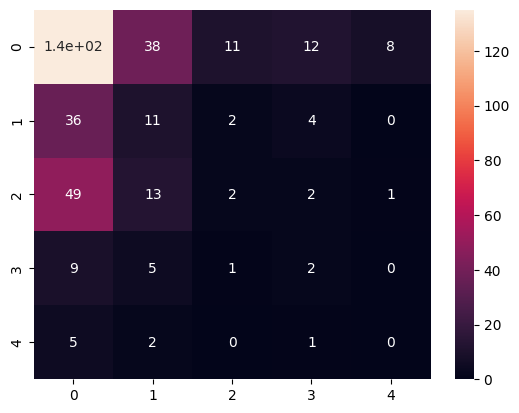

In [42]:
print_metrics(test_labels,ensemble_pred_val )